In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations


In [3]:
# 确保文件路径指向的是一个txt文件
file_path = r'D:\dog_video\Feb\2_2_kt\all_good\dataset.txt'

try:
    with open(file_path, 'r') as file:
        data = file.readlines()
except PermissionError:
    print(f"Permission denied: {file_path}")
    exit()
except FileNotFoundError:
    print(f"File not found: {file_path}")
    exit()

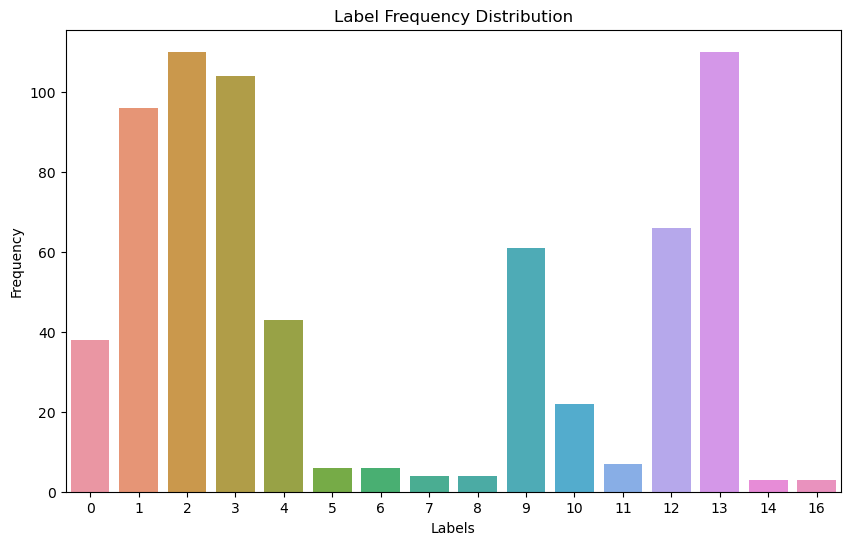

In [24]:

# 解析文件名和标签
video_labels = [line.strip().split(' ')[1].split(',') for line in data]
labels_flat = [label for sublist in video_labels for label in sublist]

# 将标签转换为整数并排序
labels_flat = [int(label) for label in labels_flat]

# 设置标签范围
max_label = 17
all_labels = list(range(max_label + 1))

# 计算标签频率分布
label_counts = Counter(labels_flat)
label_df = pd.DataFrame.from_dict(label_counts, orient='index', columns=['Frequency'])
label_df = label_df.reindex(all_labels, fill_value=0)  # 补全所有标签，频率为0

# 计算标签频率分布和比例
label_counts = Counter(labels_flat)
total_videos = len(video_labels)
label_df = pd.DataFrame.from_dict(label_counts, orient='index', columns=['Frequency'])
label_df['Proportion'] = label_df['Frequency'] / total_videos

# 生成标签组合频率
combination_counts = Counter([tuple(sorted(labels)) for labels in video_labels])
combination_df = pd.DataFrame(combination_counts.items(), columns=['Combination', 'Frequency'])
combination_df['Proportion'] = combination_df['Frequency'] / total_videos

# 可视化标签频率分布
plt.figure(figsize=(10, 6))
sns.barplot(x=label_df.index, y='Frequency', data=label_df)
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Label Frequency Distribution')
# plt.xticks(ticks=np.arange(max_label + 1), labels=all_labels)  # 显示所有标签，包括未出现的
plt.show()


In [25]:
print(label_counts)

Counter({2: 110, 13: 110, 3: 104, 1: 96, 12: 66, 9: 61, 4: 43, 0: 38, 10: 22, 11: 7, 5: 6, 6: 6, 7: 4, 8: 4, 14: 3, 16: 3})


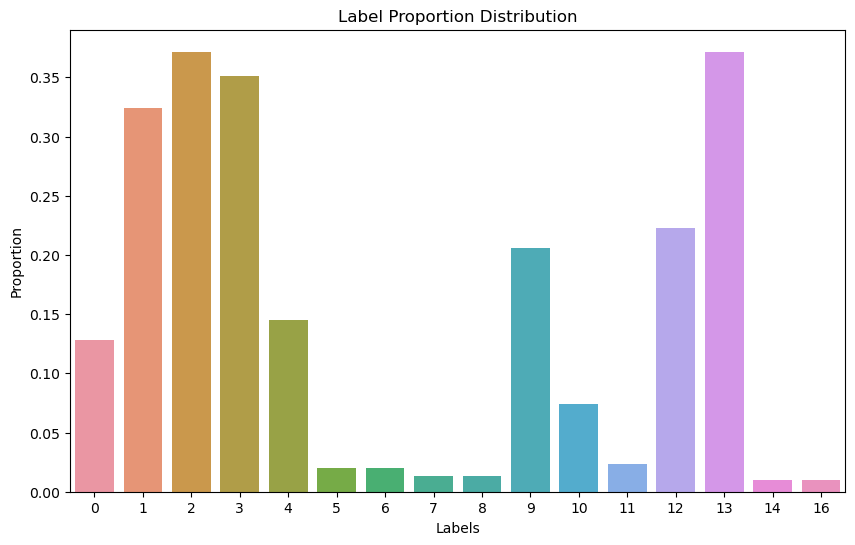

In [19]:

# 可视化标签比例分布
plt.figure(figsize=(10, 6))
sns.barplot(x=label_df.index, y='Proportion', data=label_df)
plt.xlabel('Labels')
plt.ylabel('Proportion')
plt.title('Label Proportion Distribution')
plt.show()




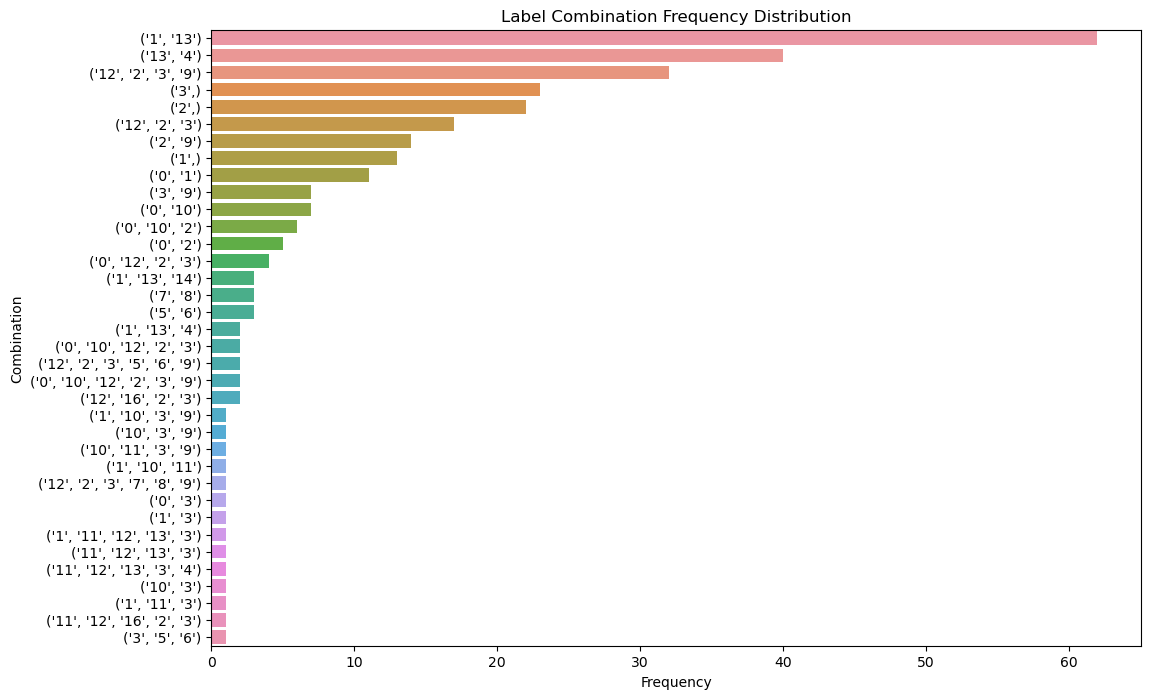

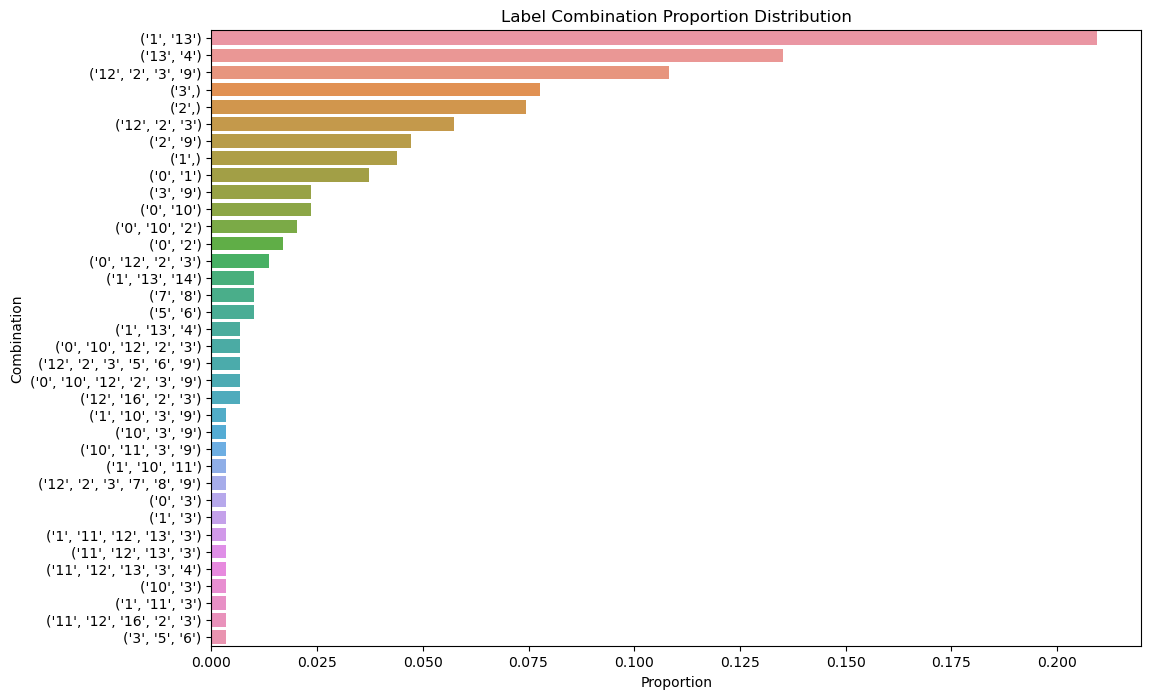

In [14]:

# 可视化标签组合频率分布
plt.figure(figsize=(12, 8))
sns.barplot(y='Combination', x='Frequency', data=combination_df.sort_values(by='Frequency', ascending=False))
plt.xlabel('Frequency')
plt.ylabel('Combination')
plt.title('Label Combination Frequency Distribution')
plt.show()

# 可视化标签组合比例分布
plt.figure(figsize=(12, 8))
sns.barplot(y='Combination', x='Proportion', data=combination_df.sort_values(by='Proportion', ascending=False))
plt.xlabel('Proportion')
plt.ylabel('Combination')
plt.title('Label Combination Proportion Distribution')
plt.show()
